# SGD Linear Regression on Boston House price

# Attribute Information (in order):

CRIM     per capita crime rate by town

ZN       proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS    proportion of non-retail business acres per town

CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX      nitric oxides concentration (parts per 10 million)

RM       average number of rooms per dwelling

AGE      proportion of owner-occupied units built prior to 1940

DIS      weighted distances to five Boston employment centres

RAD      index of accessibility to radial highways

TAX      full-value property-tax rate per $10,000

PTRATIO  pupil-teacher ratio by town

B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT    % lower status of the population

MEDV     Median value of owner-occupied homes in $1000's

# Objective:

Based on the above attributes, we need to create a model such that it predicts the price of house.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing Boston house dataset

from sklearn.datasets import load_boston

boston = load_boston()

# Getting the information of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# Creating a dataframe

df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# Adding target column to the existing dataframe (df)

df['Price'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
print("Shape of dataframe is ", df.shape)
print("Number of rows are ", df.shape[0])
print("Number of columns are ", df.shape[1])

Shape of dataframe is  (506, 14)
Number of rows are  506
Number of columns are  14


# Null values

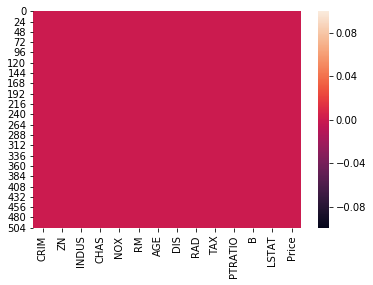

In [6]:
# sns heatmap to check null values

sns.heatmap(df.isnull())

# Observation:
    
From the above heatmap, we can notice no null values

In [7]:
# Assigning independent variables to x and dependent variables to y

x = df.drop('Price', axis = 1)
y = df['Price']

# Split into train and test data

In [8]:
# Import train_test_split library
from sklearn.model_selection import train_test_split

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 5, test_size = 0.327)

# Standardization

In [9]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler, normalize

# Create an instance
sc = StandardScaler()

# Fit and transform the train data
x_train_s = sc.fit_transform(x_train)

# Transform the test data
x_test_s = sc.transform(x_test)

In [10]:
print("Shape of x_train is ", x_train.shape)
print("Shape of y_train is ", y_train.shape)
print("Shape of x_test is ", x_test.shape)
print("Shape of y_test is ", y_test.shape)

Shape of x_train is  (340, 13)
Shape of y_train is  (340,)
Shape of x_test is  (166, 13)
Shape of y_test is  (166,)


In [11]:
# Converting x_train_s, x_test_s, y_train and y_test to numpy array in order to pass it in the algorithm.

x_tr_ar = np.array(x_train_s)
x_te_ar = np.array(x_test_s)

y_tr_ar = np.array(y_train)
y_te_ar = np.array(y_test)

In [12]:
# Creating a new dataframe out of train data which later will be used create mini batches for SGD.

d = pd.DataFrame(x_tr_ar)
d['Price'] = y_tr_ar

# Displaying head of 5
d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Price
0,-0.337828,-0.501493,-0.420017,-0.256575,-0.125514,-0.682616,0.808408,0.438044,-0.640338,-0.581537,1.174696,0.199041,0.323687,16.6
1,0.914026,-0.501493,1.074845,-0.256575,1.636288,0.488430,0.960878,-0.825750,1.658659,1.555328,0.804155,-2.847570,1.524257,13.4
2,-0.411268,-0.501493,-1.129927,-0.256575,-0.552882,1.030899,0.666574,-0.184784,-0.870238,-0.801771,-0.307467,0.427454,-0.997507,23.6
3,0.125742,-0.501493,1.074845,-0.256575,1.444408,-3.914474,0.723308,-1.078528,1.658659,1.555328,0.804155,-0.054016,-0.767611,27.5
4,-0.405742,0.841792,-0.901795,-0.256575,-1.084911,0.099516,-0.517733,1.601122,-0.410439,-0.623203,-0.863278,0.151921,-0.185774,22.2


# Defining a function to create own Stochastic Gradient Descent (SGD)

SGD is the additional feature of GD which is reduces the number of iteration unlike GD.
In SGD, suppose number of iteration is k and in GD number of iteration is n such that 1 < k < n.

Referrences:

https://stackoverflow.com/questions/50328545/stochastic-gradient-descent-for-linear-regression-on-partial-derivatives

https://towardsdatascience.com/linear-regression-using-gradient-descent-in-10-lines-of-code-642f995339c0

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [13]:
# Defining a function to create own SGD

def own_sgd(da, iteration, l_r, eta0, power_t = 0.25):
                                                    # Number of iteration
    rate = eta0                                     # Learning rate (we are taking 0.01)
    ite = 1                                               
    w_o = np.random.rand(13)                  # Initial random weights to pass in linear equation
    b_o = np.random.rand()                                        # Initial intercept to pass in linear equation
    
    while (ite <= iteration):                                
        
        w_u = w_o                                   # Assigning initial weights to variable
        b_u = b_o                                   # Assigning initial intercept to variable
        
        de = da.sample(n = 10, random_state = 1)
        x = np.array(de.drop('Price', axis = 1))
        y = np.array(de['Price'])
        
        w_dif = np.random.rand(13)           # Initial weights to pass in as differentiated weight
        b_dif = np.random.rand()                              # Initial intercept to pass in as differentiated intercept
        
        for i in range(10):                      # For loop to work on partially differentiated linear cost function
            
            # partial differentiated w.r.t weight (w) equation - summation over (-2x) (y-(mx+c))
            # partial differentiated w.r.t intercept (b) equation - summation over (-x) (y-(mx+c))
            y_new = y[i] - (np.dot(w_u, x[i]) + b_u)    
            w_dif += x[i] * y_new 
            b_dif += y_new
            
        w_dif *= (-2/x.shape[0])                    # Updating weights to pass in as partially differentiated weight         
        b_dif *= (-2/x.shape[0])                    # Updating intercept to pass in as partially differentiated intercept
    
        w_o = w_u - np.dot(rate, w_dif)             # Calculating SGD for weights
        b_o = b_u - np.dot(rate, b_dif)             # Calculating SGD for intercept
        
                                                    # Updating intercept to pass in linear equation
        
        if l_r == "invscaling":                     # If condition for optimal learning rate "invscaling"
            rate = eta0 / pow(ite, power_t)
             
        ite += 1                                    # Incrementing till the defined iteration
        
    return w_o, b_o                                 # Returns weights and intercept
    

# Defining a function to predict on test data with above weights (w) and intercept (b).

# Plotting actual values v/s predicted values
# Finding mean squared error

In [14]:
# Defining a function to predict on test data with above weights (w) and intercept (b)

from sklearn.metrics import mean_squared_error

def pred(x_te, y_te, w, b):

    y_pred = []                                        # Stores all predicted values in it.
    err = []
    er = 0                                             # Initial error value as 0
     
    for i in range(len(x_te)):
        p = np.asscalar(np.dot(w, x_te[i]) + b)        # Calculating linear equation mx+c
        er += (y_te[i] - p)** 2
        error = np.array(er)
        
        err.append(error)
        y_pred.append(p)                               # Appends predicted values
        
    predicted = np.array(y_pred)
    
    # Plotting actual values v/s predicted values
    plt.scatter(y_te, predicted)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title("Own SGD - Actual values v/s Predicted values")
    
    # Mean Squared Error
    return error/float(len(x_te))                       # Returns mean squared error

# Defining function for sklearn SGD

In [15]:
# Defining function for sklearn SGD

from sklearn.linear_model import SGDRegressor

def skl(x_tr, y_tr, x_te, y_te, l_r, et, n_iter):
    
    sg = SGDRegressor(learning_rate = l_r, eta0 = et, n_iter = n_iter)
    sg = sg.fit(x_tr, y_tr)
    sk_y_pred = sg.predict(x_te)
    
    # Plotting actual values v/s predicted values
    plt.scatter(y_te, sk_y_pred)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title(" sklearn SGD - Actual v/s Predicted")
    
    return sg.coef_, sg.intercept_,  mean_squared_error(y_te, sk_y_pred)

# Defining a function to get mean squared error, intercept and weights.

In [16]:
# Defining a function to get weights, intercept and mean squared error

def miw(m_mse, m_b, m_w, s_mse, s_b, s_w):
    
    print("Manual SGD")
    print("-"*25, '\n')
    print("Mean Squared Error: ", m_mse, '\n')
    print("Intercept: ", m_b, '\n')
    print("Weights:", '\n')
    print(m_w, '\n')
    
    print("*"*50, '\n')
    
    print("Sklearn SGD")
    print("-"*25, '\n')
    print("Mean Squared Error: ", s_mse, '\n')
    print("Intercept: ", s_b, '\n')
    print("Weights:", '\n')
    print(s_w)    

In [17]:
# Creating table for learning rate 'constant'

table_constant = pd.DataFrame(columns = ['S.No', 'SGD Regressor', 'Learning Rate', 'Initial Rate',
                                          'Iteration', 'Power', 'Mean Squared Error'])

# Calling functions with learning_rate = 'constant'

# Own SGD implimentation

learning rate = 'constant'

iteration = 10

eta0 (rate) = 0.01

In [18]:
# Calling own_sgd function and assigning weights (w) and intercept (b)

w_c_10, b_c_10 = own_sgd(d, 10, 'constant', 0.01)


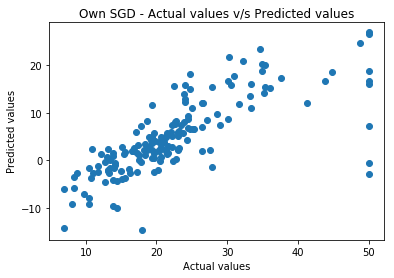

In [19]:
# Using obtained weights (w) and intercept (b), predicting test data

mse_c_10 = pred(x_te_ar, y_te_ar, w_c_10, b_c_10)

In [20]:
table_constant.loc[0] = [1, 'Manual SGD', 'constant', 0.01, 10, 0.25, mse_c_10]

# sklearn SGD implimentation

learning_rate = 'constant'

iteration = 10

eta0 (rate) = 0.01

c:\users\brothers\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


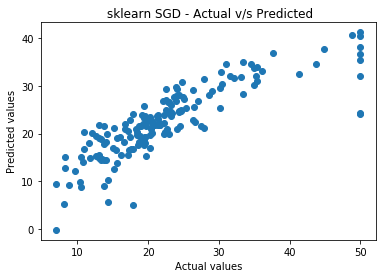

In [21]:
s_w_c_10, s_b_c_10, s_mse_c_10 = skl(x_tr_ar, y_tr_ar, x_te_ar, y_te_ar, 'constant', 0.01, 10)

In [22]:
table_constant.loc[1] = [2, 'Sklearn SGD', 'constant', 0.01, 10, 0.25, s_mse_c_10]

# Weights, intercept and mean squared error

In [23]:
# Calling miw function to get mse, intercept and weight

miw(mse_c_10, b_c_10, w_c_10, s_mse_c_10, s_b_c_10, s_w_c_10)

Manual SGD
------------------------- 

Mean Squared Error:  353.249847948423 

Intercept:  5.171469416422844 

Weights: 

[ 0.27179477  1.96317313 -0.67224188 -0.36742571  0.08598312  3.79744361
 -0.39957943 -0.60419974 -0.21876118 -0.05121822 -1.72776806  0.8515834
 -1.5585484 ] 

************************************************** 

Sklearn SGD
------------------------- 

Mean Squared Error:  28.31510882619527 

Intercept:  [23.13770497] 

Weights: 

[-0.81807911  1.00617048 -0.13129044 -0.02696679 -1.61584677  2.58045168
 -0.25034417 -2.85746306  2.82931039 -1.75370798 -2.03980377  0.65442688
 -3.1696728 ]


# Own SGD implimentation

learning rate = 'constant'

iteration = 100

eta0 (rate) = 0.01

In [24]:
# Calling own_sgd function and assigning weights (w) and intercept (b)

w_c_100, b_c_100 = own_sgd(d, 100, 'constant', 0.01)

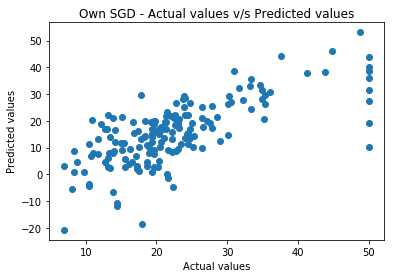

In [25]:
# Using obtained weights (w) and intercept (b), predicting test data

mse_c_100 = pred(x_te_ar, y_te_ar, w_c_100, b_c_100)

In [26]:
table_constant.loc[2] = [3, 'Manual SGD', 'constant', 0.01, 100, 0.25, mse_c_100]

# sklearn SGD implimentation

learning_rate = 'constant'

iteration = 100

eta0 (rate) = 0.01

c:\users\brothers\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


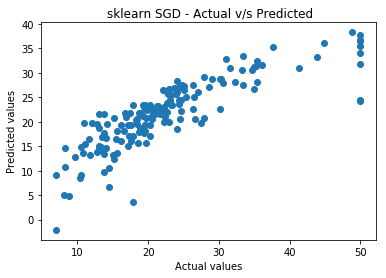

In [27]:
# Calling sklearn sgd function and assigning weights (w) and intercept (b)

s_w_c_100, s_b_c_100, s_mse_c_100 = skl(x_tr_ar, y_tr_ar, x_te_ar, y_te_ar, 'constant', 0.01, 100)

In [28]:
table_constant.loc[3] = [4, 'Sklearn SGD', 'constant', 0.01, 100, 0.25, s_mse_c_100]

# Weight, intercept and mean squared error

In [29]:
# Calling miw function to get mse, intercept and weight

miw(mse_c_100, b_c_100, w_c_100, s_mse_c_100, s_b_c_100, s_w_c_100)

Manual SGD
------------------------- 

Mean Squared Error:  117.22163766211325 

Intercept:  16.422119146182272 

Weights: 

[-0.07483892  1.44262178 -0.18119362 -3.03208863  0.292717    6.90676442
  0.70850848 -4.28385607  0.81842182  1.33686783 -2.22845316  2.06779038
 -5.7811177 ] 

************************************************** 

Sklearn SGD
------------------------- 

Mean Squared Error:  30.35789114427949 

Intercept:  [22.37771031] 

Weights: 

[-1.16475117  0.48493593 -0.04260192  0.1251348  -1.29508652  2.25038695
 -0.3322592  -2.79903287  3.10780979 -2.17041445 -1.72578418  1.07852831
 -3.05652661]


# Own SGD implimentation

learning_rate = 'constant'

iteration = 1000

eta0 (rate) = 0.01

In [30]:
# Calling own_sgd function and assigning weights (w) and intercept (b)

w_c_1k, b_c_1k = own_sgd(d, 1000, 'constant', 0.01)

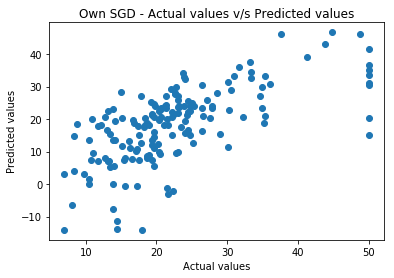

In [31]:
# Using obtained weights (w) and intercept (b), predicting test data

mse_c_1k = pred(x_te_ar, y_te_ar, w_c_1k, b_c_1k)

In [32]:
table_constant.loc[4] = (5, 'Manual SGD', 'constant', 0.01, 1000, 0.25, mse_c_1k)

# Sklearn SGD implimentation

learning_rate = 'constant'

iteration = 1000

eta0 (rate) = 0.01

c:\users\brothers\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


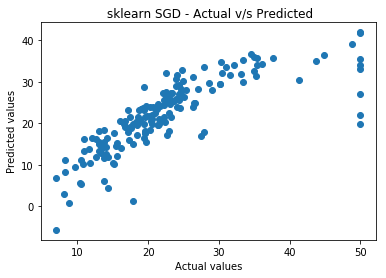

In [33]:
# Calling sklearn sgd function and assigning weights (w) and intercept (b)

s_w_c_1k, s_b_c_1k, s_mse_c_1k = skl(x_tr_ar, y_tr_ar, x_te_ar, y_te_ar, 'constant', 0.01, 1000)

In [34]:
table_constant.loc[5] = [6, 'Sklearn SGD', 'constant', 0.01, 1000, 0.25, s_mse_c_1k]

# Weights, intercept and mean squared error

In [35]:
# Calling miw function to get mse, intercept and weight

miw(mse_c_1k, b_c_1k, w_c_1k, s_mse_c_1k, s_b_c_1k, s_w_c_1k)

Manual SGD
------------------------- 

Mean Squared Error:  96.9315919448252 

Intercept:  19.336921814498407 

Weights: 

[ 1.31007953 -1.85045026 -1.06464053 -3.51743189 -1.20094719  4.40875563
  0.22073633 -3.83996389  0.77463915  1.96784535 -1.56257856  1.51246222
 -8.84950696] 

************************************************** 

Sklearn SGD
------------------------- 

Mean Squared Error:  35.174407471500906 

Intercept:  [22.7284311] 

Weights: 

[-1.37390607  1.03202158 -0.3343032  -0.31369484 -1.87118993  2.08501959
 -0.75298369 -2.27266844  2.78750087 -2.41964381 -2.09549643  0.87354488
 -3.199621  ]


# Own SGD implimentation

learning_rate = 'constant'

iteration = 10000

eta0 (rate) = 0.01

In [36]:
# Calling own_sgd function and assigning weights (w) and intercept (b)

w_c_10k, b_c_10k = own_sgd(d, 10000, 'constant', 0.01)

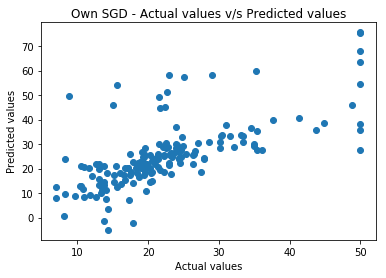

In [37]:
# Using obtained weights (w) and intercept (b), predicting test data

mse_c_10k = pred(x_te_ar, y_te_ar, w_c_10k, b_c_10k)

In [38]:
table_constant.loc[6] = [7, 'Manual SGD', 'constant', 0.01, 10000, 0.25, mse_c_10k]

# Sklearn SGD implimentation

learning_rate = 'constant'

iteration = 10000

eta0 (rate) = 0.01

c:\users\brothers\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


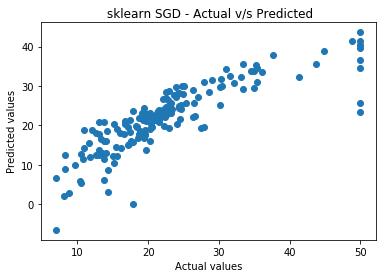

In [39]:
# Calling sklearn sgd function and assigning weights (w) and intercept (b)

s_w_c_10k, s_b_c_10k, s_mse_c_10k = skl(x_tr_ar, y_tr_ar, x_te_ar, y_te_ar, 'constant', 0.01, 10000)

In [40]:
table_constant.loc[7] = [8, 'Sklearn SGD', 'constant', 0.01, 10000, 0.25, s_mse_c_10k]

# Weights, intercept and mean squared error

In [41]:
# Calling miw function to get mse, intercept and weight

miw(mse_c_10k, b_c_10k, w_c_10k, s_mse_c_10k, s_b_c_10k, s_w_c_10k)

Manual SGD
------------------------- 

Mean Squared Error:  105.08070306417906 

Intercept:  24.86708056776552 

Weights: 

[ 5.14783900e+00 -8.70590763e-01 -6.90206176e-01  6.97549550e+00
  4.94052285e-01  1.97753932e+00  1.85759230e+00 -6.67553926e-03
 -2.15273422e+00  9.37798605e-01 -3.35100387e+00  1.18816801e+00
 -7.37821785e+00] 

************************************************** 

Sklearn SGD
------------------------- 

Mean Squared Error:  27.342820353794885 

Intercept:  [22.55243219] 

Weights: 

[-1.23267106  0.68808455 -0.08130756  0.56605002 -1.58588697  2.9473358
 -0.34976532 -2.73954556  3.21291074 -2.20127116 -1.93000973  1.05554629
 -3.57745635]


# Calling functions with learning_rate = 'invscaling'

# Own SGD implimentation

learning_rate = 'invscaling'

iteration = 10

eta0 (rate) = 0.01

In [42]:
# Creating table for invscaling

table_invscaling = pd.DataFrame(columns = ['S.No', 'SGD Regressor', 'Learning Rate', 'Initial Rate',
                                            'Iteration', 'Power', 'Mean Squared Error'])

In [43]:
# Calling own_sgd function and assigning weights (w) and intercept (b)

w_i_10, b_i_10 = own_sgd(d, 10, 'invscaling', 0.01)

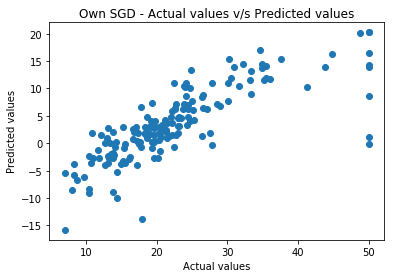

In [44]:
# Using obtained weights (w) and intercept (b), predicting test data

mse_i_10 = pred(x_te_ar, y_te_ar, w_i_10, b_i_10)

In [45]:
table_invscaling.loc[0] = [1, 'Manual SGD', 'Invscaling', 0.01, 10, 0.25, mse_i_10]

# Sklearn SGD implimentation

learning_rate = 'invscaling'

iteration = 10

eta0 (rate) = 0.01

c:\users\brothers\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


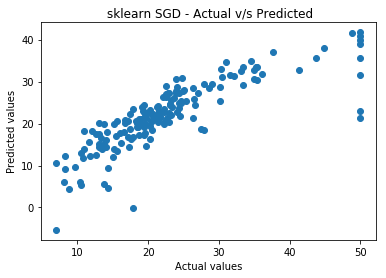

In [46]:
# Calling sklearn sgd function and assigning weights (w) and intercept (b)

s_w_i_10, s_b_i_10, s_mse_i_10 = skl(x_tr_ar, y_tr_ar, x_te_ar, y_te_ar, 'invscaling', 0.01, 10)

In [47]:
table_invscaling.loc[1] = [2, 'Sklearn SGD', 'Invscaling', 0.01, 10, 0.25, s_mse_i_10]

# Weights, intercept and mean squared error

In [48]:
# Calling miw function to get mse, intercept and weight

miw(mse_i_10, b_i_10, w_i_10, s_mse_i_10, s_b_i_10, s_w_i_10)

Manual SGD
------------------------- 

Mean Squared Error:  398.9663666332191 

Intercept:  3.784175578133705 

Weights: 

[-0.34325302  1.18605718 -0.7765952  -0.19215884 -0.23300725  3.19580575
  0.16263462 -0.71793853  0.24775709  0.38860039 -1.26380845  0.84046254
 -1.84877703] 

************************************************** 

Sklearn SGD
------------------------- 

Mean Squared Error:  29.008218848045676 

Intercept:  [22.48093298] 

Weights: 

[-1.01588836  0.48061415 -0.34949233  0.25854113 -0.91430763  3.05743569
 -0.30526643 -2.09661274  1.09038277 -0.50685262 -2.06025871  0.96651256
 -3.27291438]


# Own SGD implimentation

learning_rate = 'invscaling'

iteration = 100

eta0 (rate) = 0.01

In [49]:
# Calling own_sgd function and assigning weights (w) and intercept (b)

w_i_100, b_i_100 = own_sgd(d, 100, 'invscaling', 0.01)

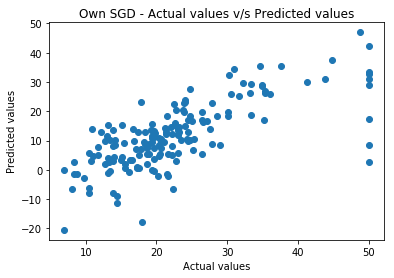

In [50]:
# Using obtained weights (w) and intercept (b), predicting test data

mse_i_100 = pred(x_te_ar, y_te_ar, w_i_100, b_i_100)

In [51]:
table_invscaling.loc[2] = [3, 'Manual SGD', 'Invscaling', 0.01, 100, 0.25, mse_i_100]

# Sklearn SGD implimentation

learning_rate = 'invscaling'

iteration = 100

eta0 (rate) = 0.01

c:\users\brothers\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


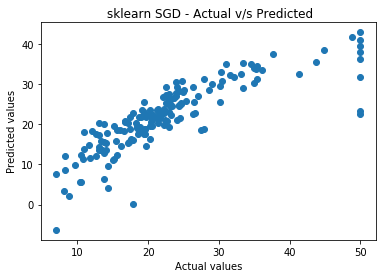

In [52]:
# Calling sklearn sgd function and assigning weights (w) and intercept (b)

s_w_i_100, s_b_i_100, s_mse_i_100 = skl(x_tr_ar, y_tr_ar, x_te_ar, y_te_ar, 'invscaling', 0.01, 100)

In [53]:
table_invscaling.loc[3] = [4, 'Sklearn SGD', 'Invscaling', 0.01, 100, 0.25, s_mse_i_100]

# Weights, intercept and mean squared error

In [54]:
# Calling miw function to get mse, intercept and weight

miw(mse_i_100, b_i_100, w_i_100, s_mse_i_100, s_b_i_100, s_w_i_100)

Manual SGD
------------------------- 

Mean Squared Error:  177.747871154381 

Intercept:  12.27822739425763 

Weights: 

[-0.42000389  2.27719924 -0.18973537 -2.62285762  0.16790996  6.64574759
  0.24620195 -2.74331772  0.56939929  1.4625872  -3.13946775  1.54426312
 -3.57513566] 

************************************************** 

Sklearn SGD
------------------------- 

Mean Squared Error:  28.712595482786003 

Intercept:  [22.52437501] 

Weights: 

[-1.2975344   0.84343368 -0.28699428  0.21282437 -1.47768158  2.79166457
 -0.35242816 -2.76857487  2.60908479 -1.89031726 -2.11888424  1.05123389
 -3.32447132]


# Own SGD implimentation

learning_rate = 'invscaling'

iteration = 1000

eta0 (rate) = 0.01

In [55]:
# Calling own_sgd function and assigning weights (w) and intercept (b)

w_i_1k, b_i_1k = own_sgd(d, 1000, 'invscaling', 0.01)

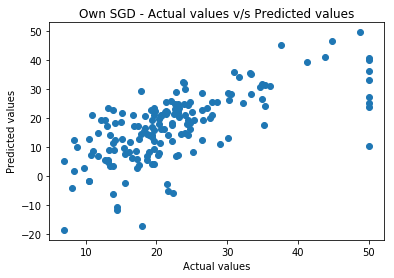

In [56]:
# Using obtained weights (w) and intercept (b), predicting test data

mse_i_1k = pred(x_te_ar, y_te_ar, w_i_1k, b_i_1k)

In [57]:
table_invscaling.loc[4] = [5, 'Manual SGD', 'Invscaling', 0.01, 1000, 0.25, mse_i_1k]

# Sklearn SGD implimentation

learning_rate = 'invscaling'

iteration = 1000

eta0 (rate) = 0.01

c:\users\brothers\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


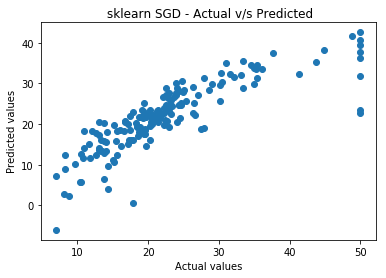

In [58]:
# Calling sklearn sgd function and assigning weights (w) and intercept (b)

s_w_i_1k, s_b_i_1k, s_mse_i_1k = skl(x_tr_ar, y_tr_ar, x_te_ar, y_te_ar, 'invscaling', 0.01, 1000)

In [59]:
table_invscaling.loc[5] = [6, 'Sklearn SGD', 'Invscaling', 0.01, 1000, 0.25, s_mse_i_1k]

# Weights, intercept and mean squared error

In [60]:
# Calling miw function to get mse, intercept and weight

miw(mse_i_1k, b_i_1k, w_i_1k, s_mse_i_1k, s_b_i_1k, s_w_i_1k)

Manual SGD
------------------------- 

Mean Squared Error:  107.21980207612128 

Intercept:  18.085226609658857 

Weights: 

[ 5.21007957e-01  4.98938863e-03  9.20325139e-03 -3.94814123e+00
 -6.59753394e-01  5.89101337e+00  2.89225567e-01 -4.18850288e+00
  6.43822235e-01  1.80946678e+00 -1.76028164e+00  2.18368709e+00
 -7.17334567e+00] 

************************************************** 

Sklearn SGD
------------------------- 

Mean Squared Error:  28.577868333644517 

Intercept:  [22.52438148] 

Weights: 

[-1.29864723  0.85442216 -0.16372529  0.18781855 -1.47231905  2.77440958
 -0.30875373 -2.77128219  2.97545953 -2.26025426 -2.12537746  1.05093109
 -3.32227417]


# Own SGD implimentation

learning_rate = 'invscaling'

iteration = 10000

eta0 (rate) = 0.01

In [61]:
# Calling own_sgd function and assigning weights (w) and intercept (b)

w_i_10k, b_i_10k = own_sgd(d, 10000, 'invscaling', 0.01)

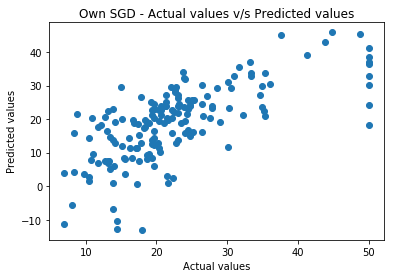

In [62]:
# Using obtained weights (w) and intercept (b), predicting test data

mse_i_10k = pred(x_te_ar, y_te_ar, w_i_10k, b_i_10k)

In [63]:
table_invscaling.loc[6] = [7, 'Manual SGD', 'Invscaling', 0.01, 10000, 0.25, mse_i_10k]

# Sklearn SGD implimentation

learning_rate = 'invscaling'

iteration = 1500

eta0 (rate) = 0.01

c:\users\brothers\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


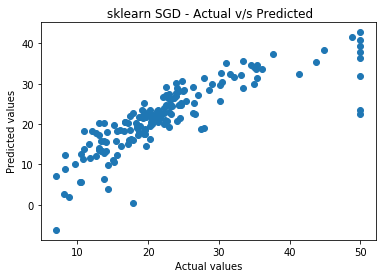

In [64]:
# Calling sklearn_sgd function and assigning weights (w) and intercept (b)

s_w_i_10k, s_b_i_10k, s_mse_i_10k = skl(x_tr_ar, y_tr_ar, x_te_ar, y_te_ar, 'invscaling', 0.01, 10000)

In [65]:
table_invscaling.loc[7] = [8, 'Sklearn SGD', 'Invscaling', 0.01, 10000, 0.25, s_mse_i_10k]

# Weights, intercept and mean squared error

In [66]:
# Calling miw function to get mse, intercept and weight

miw(mse_i_10k, b_i_10k, w_i_10k, s_mse_i_10k, s_b_i_10k, s_w_i_10k)

Manual SGD
------------------------- 

Mean Squared Error:  82.14591904354263 

Intercept:  19.821314350905173 

Weights: 

[ 1.73716339 -2.05532967 -0.65231014 -2.64686101 -1.27573593  4.29291593
 -0.34791577 -3.6826553   0.66963565  1.76110782 -1.79878257  1.61226053
 -8.49229615] 

************************************************** 

Sklearn SGD
------------------------- 

Mean Squared Error:  28.68467853222017 

Intercept:  [22.52194578] 

Weights: 

[-1.31019777  0.85977304 -0.17214097  0.18884791 -1.48035072  2.7865439
 -0.31805979 -2.76315396  2.96724394 -2.26868899 -2.12908376  1.05527119
 -3.33277503]


# Table for learning rate 'constant'

In [67]:
print("Table for learning rate 'constant'")

table_constant

Table for learning rate 'constant'


,S.No,SGD Regressor,Learning Rate,Initial Rate,Iteration,Power,Mean Squared Error
0,1,Manual SGD,constant,0.01,10,0.25,353.249848
1,2,Sklearn SGD,constant,0.01,10,0.25,28.315109
2,3,Manual SGD,constant,0.01,100,0.25,117.221638
3,4,Sklearn SGD,constant,0.01,100,0.25,30.357891
4,5,Manual SGD,constant,0.01,1000,0.25,96.931592
5,6,Sklearn SGD,constant,0.01,1000,0.25,35.174407
6,7,Manual SGD,constant,0.01,10000,0.25,105.080703
7,8,Sklearn SGD,constant,0.01,10000,0.25,27.342820


# Table for learning rate 'invscaling'

In [68]:
# Table for learning rate 'invscaling'

table_invscaling

,S.No,SGD Regressor,Learning Rate,Initial Rate,Iteration,Power,Mean Squared Error
0,1,Manual SGD,Invscaling,0.01,10,0.25,398.966367
1,2,Sklearn SGD,Invscaling,0.01,10,0.25,29.008219
2,3,Manual SGD,Invscaling,0.01,100,0.25,177.747871
3,4,Sklearn SGD,Invscaling,0.01,100,0.25,28.712595
4,5,Manual SGD,Invscaling,0.01,1000,0.25,107.219802
5,6,Sklearn SGD,Invscaling,0.01,1000,0.25,28.577868
6,7,Manual SGD,Invscaling,0.01,10000,0.25,82.145919
7,8,Sklearn SGD,Invscaling,0.01,10000,0.25,28.684679


# Conclusion

# Learning rate 'Constant' and 'invscaling'

1) In both case, i.e learning rate 'constant' and 'invscaling', as iterations are increasing from 10 to 10000, mean squared error is decreasing.

2) For the above particular dataset of 554 rows, as iterations are increasing mean squared errors are decreasing and number of iteration 10000 is good where mean squared error is very less i.e ~28.